In [1]:
import os.path
import pandas as pd

from os import path

In [2]:
dataset_path = 'data/limit_5K_per_type_order_by_id_desc'
df_file = 'concat.csv'

id_doc_type_true = 'id_typ_dokument_true'
id_doc_type_pred = 'id_typ_dokument_pred'

# CONCATENATE

In [3]:
df_signi = pd.read_csv(f'{dataset_path}/_original/signi.csv', sep=';')
df_hysen = pd.read_csv(f'{dataset_path}/_original/hysen.csv', sep=';')
df_tower = pd.read_csv(f'{dataset_path}/_original/tower.csv', sep=';')

df_signi['db_type'] = 'signi'
df_hysen['db_type'] = 'hysen'
df_tower['db_type'] = 'tower'

df_concat = pd.concat([df_signi, df_hysen, df_tower], ignore_index=True)

if not path.exists(f'{dataset_path}/00_chosen_types'):
    os.mkdir(f'{dataset_path}/00_chosen_types')

df_concat.to_csv(f'{dataset_path}/00_chosen_types/concat.csv', index=False, sep=';')

# Choosing document types "similar to old project"

In [4]:
res = [14, 19, 20, 27, 29, 32, 33, 34, 36, 39, 44, 49, 50, 51, 53, 55, 56, 58, 64, 69, 74, 89, 120, 123, 57, 62, 65, 66, 67, 68, 136, 138]

In [5]:
df_concat = pd.read_csv(f'{dataset_path}/00_chosen_types/concat.csv', sep=';')

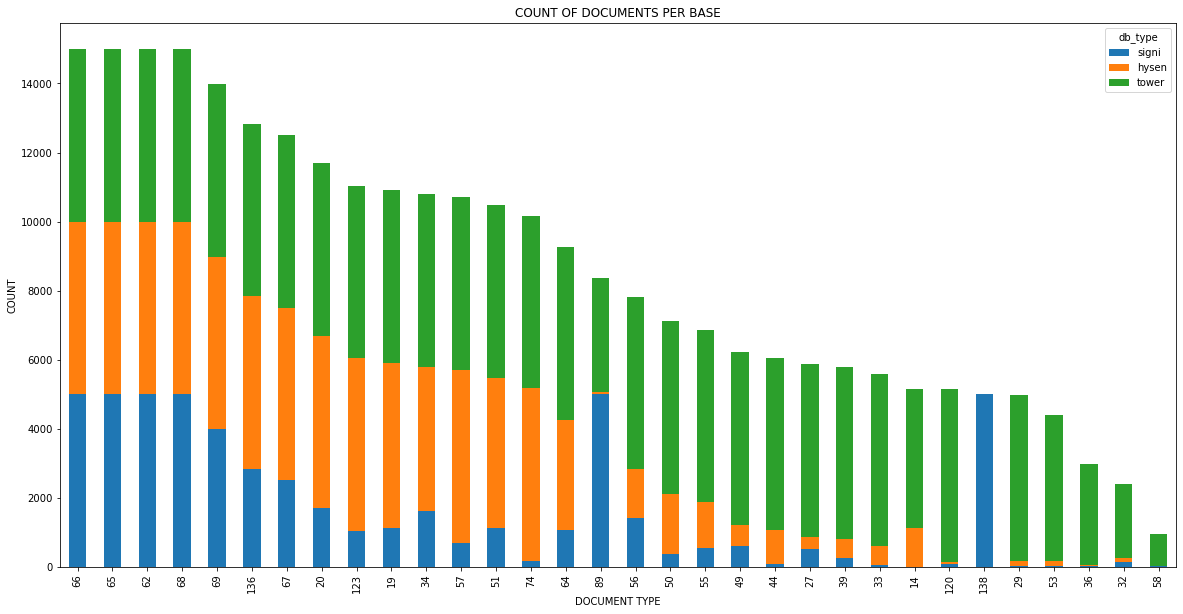

In [6]:
df = df_concat[df_concat['id_typ_dokument_true'].isin(set(res))]
df = df.groupby(['id_typ_dokument_true', 'db_type']).size().unstack(fill_value=0)
df['sum'] = df.sum(axis = 1, skipna = True)
ax = df.sort_values('sum', ascending=False)[['signi', 'hysen', 'tower']].plot(    kind='bar', 
                                                                        figsize=(20,10), 
                                                                        title=f"COUNT OF DOCUMENTS PER BASE", 
                                                                        xlabel='DOCUMENT TYPE',
                                                                        ylabel='COUNT',
                                                                        stacked=True)

In [7]:
df_chosen_types = pd.DataFrame(columns=['id_typ_dokument', 'opis', 'signi_t', 'signi_f', 'signi_acc', 'tower_t', 'tower_f', 'tower_acc', 'hysen_t', 'hysen_f', 'hysen_acc'])

df_stats_signi = pd.read_csv('data/stats_last_year/nlp_document_count_signi.csv', sep=';', encoding='windows-1250')
df_stats_tower = pd.read_csv('data/stats_last_year/nlp_document_count_hoist_tower.csv', sep=';')
df_stats_hysen = pd.read_csv('data/stats_last_year/nlp_document_count_hoist_hysen.csv', sep=';', encoding='windows-1250')

for doc_type in set(res): 
    opis = df_stats_signi[df_stats_signi['id_typ_dokument'] == doc_type]['opis'].tolist()
    if opis == []:
        opis = df_stats_hysen[df_stats_hysen['id_typ_dokument'] == doc_type]['opis'].tolist()
        if opis == []:
            opis = df_stats_tower[df_stats_tower['id_typ_dokument'] == doc_type]['opis'].tolist()
    if opis != []:
        opis = opis[0]
    else:
        opis = ''

    rec4df = {'id_typ_dokument': doc_type, 'opis': opis}
    
    for db_type in set(df_concat['db_type']):
        t, f = 0, 0

        recs = df_concat[(df_concat[id_doc_type_true] == doc_type) & (df_concat['db_type'] == db_type)].values.tolist()
        if recs != []:
            t += len(recs)
            f += df_concat[(df_concat[id_doc_type_true] == doc_type) & (df_concat[id_doc_type_pred] != doc_type) & (df_concat['db_type'] == db_type)].shape[0]

        rec4df[f'{db_type}_t'] = t
        rec4df[f'{db_type}_f'] = f
        rec4df[f'{db_type}_acc'] = t/(t+f) if t != 0 else 0.0

    df_chosen_types = df_chosen_types.append(rec4df, ignore_index=True)

df_chosen_types = df_chosen_types.sort_values(by=['id_typ_dokument'])
df_chosen_types = df_chosen_types.reset_index(drop=True)
df_chosen_types

,id_typ_dokument,opis,signi_t,signi_f,signi_acc,tower_t,tower_f,tower_acc,hysen_t,hysen_f,hysen_acc
0,14,BTE z klauzulą wykonalności,0,0,0.000000,4025,267,0.937791,1127,55,0.953469
1,19,Nakaz zapłaty bez klauzuli wykonalności,1122,6,0.994681,5000,34,0.993246,4783,9,0.998122
2,20,Nakaz zapłaty z klauzulą wykonalności,1686,9,0.994690,5000,5,0.999001,5000,2,0.999600
3,27,Postanowienie o oddaleniu wniosku o nadanie kl...,521,1,0.998084,5000,54,0.989315,342,1,0.997085
4,29,Postanowienie o odrzuceniu pozwu,14,0,1.000000,4803,16,0.996680,162,11,0.936416
5,32,Postanowienie o sprostowaniu,147,0,1.000000,2118,11,0.994833,117,2,0.983193
6,33,Postanowienie o uchyleniu nakazu zapłaty,36,0,1.000000,5000,15,0.997009,558,1,0.998211
7,34,Postanowienie o umorzeniu postępowania,1616,2,0.998764,5000,46,0.990884,4178,21,0.994999
8,36,Postanowienie o zwrocie opłat,15,0,1.000000,2927,12,0.995917,44,2,0.956522
9,39,Sprzeciw,256,6,0.977099,5000,189,0.963577,538,7,0.987156


In [11]:
df_chosen_types.to_csv(f'{dataset_path}/00_chosen_types/chosen_types_stats.csv', index=False, sep=';')

In [12]:
df_concat = df_concat[df_concat[id_doc_type_true].isin(set(df_chosen_types['id_typ_dokument'].tolist()))]
df_concat.to_csv(f'{dataset_path}/00_chosen_types/chosen_types_df.csv', index=False, sep=';')

# Choosing types with acc < 95% and minimum count of false classified documents >= 50 (if max count of documents by each type is 5000 then 50 - 1%)

In [3]:
min_acc = 0.95
min_f = 50

In [4]:
df_concat = pd.read_csv(f'{dataset_path}/00_chosen_types/concat.csv', sep=';')

doc_types = set(df_concat[id_doc_type_true])

res = []

for db_type in set(df_concat['db_type']):
    print(db_type)
    df = df_concat[df_concat['db_type'] == db_type]

    for d_type in doc_types:
        count_pred = df[(df[id_doc_type_pred] == d_type) & (df[id_doc_type_pred] == d_type)].shape[0]
        count_err = df[(df[id_doc_type_true] == d_type) & (df[id_doc_type_pred] != d_type)].shape[0]
        count_true = df[df[id_doc_type_true] == d_type].shape[0]
        if count_true != 0:
            acc = count_pred / count_true
            if acc <= min_acc or count_err >= min_f:
                res.append(d_type)
                print(f'{d_type} - tagged: {count_true}, incorrectly tagged: {count_err}, acc: {acc}')
  
print(sorted(list(set(res))))

tower
133 - tagged: 5000, incorrectly tagged: 81, acc: 0.9838
136 - tagged: 5000, incorrectly tagged: 286, acc: 0.9446
137 - tagged: 5000, incorrectly tagged: 55, acc: 0.9948
14 - tagged: 4025, incorrectly tagged: 267, acc: 0.9336645962732919
27 - tagged: 5000, incorrectly tagged: 54, acc: 0.9966
39 - tagged: 5000, incorrectly tagged: 189, acc: 0.963
49 - tagged: 5000, incorrectly tagged: 94, acc: 0.9896
50 - tagged: 5000, incorrectly tagged: 70, acc: 0.9952
53 - tagged: 4208, incorrectly tagged: 398, acc: 0.906606463878327
56 - tagged: 5000, incorrectly tagged: 91, acc: 0.983
317 - tagged: 3565, incorrectly tagged: 97, acc: 0.9767180925666199
hysen
133 - tagged: 2903, incorrectly tagged: 113, acc: 0.9614192214950051
136 - tagged: 5000, incorrectly tagged: 172, acc: 0.967
14 - tagged: 1127, incorrectly tagged: 55, acc: 0.9520851818988465
29 - tagged: 162, incorrectly tagged: 11, acc: 0.9444444444444444
58 - tagged: 7, incorrectly tagged: 3, acc: 0.7142857142857143
signi
133 - tagged: 5

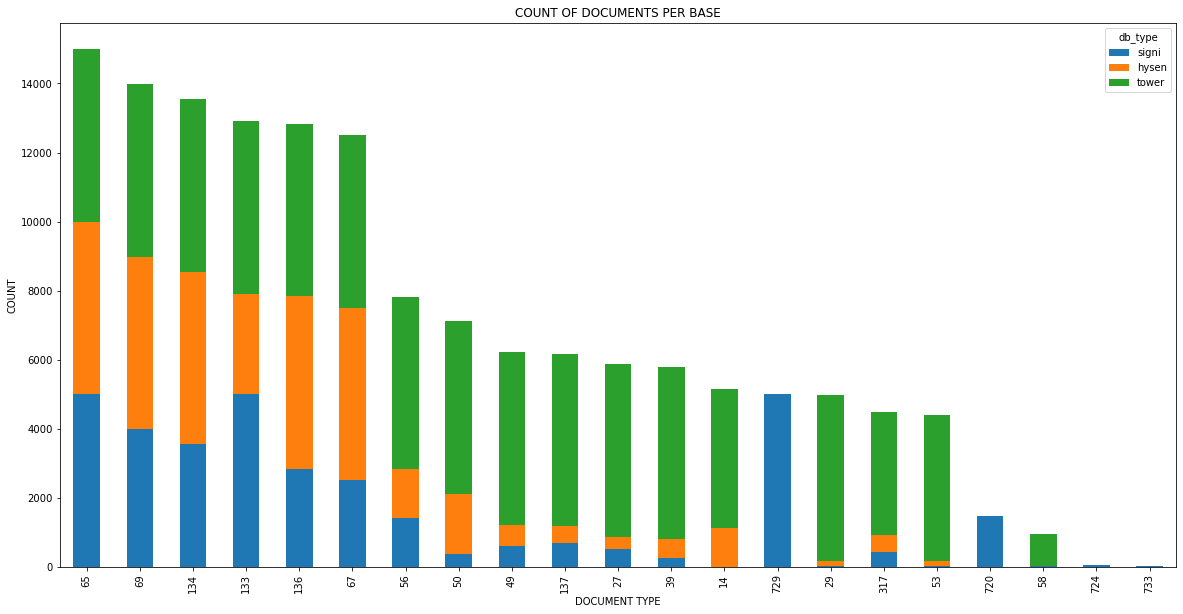

In [5]:
df = df_concat[df_concat['id_typ_dokument_true'].isin(set(res))]
df = df.groupby(['id_typ_dokument_true', 'db_type']).size().unstack(fill_value=0)
df['sum'] = df.sum(axis = 1, skipna = True)
ax = df.sort_values('sum', ascending=False)[['signi', 'hysen', 'tower']].plot(    kind='bar', 
                                                                        figsize=(20,10), 
                                                                        title=f"COUNT OF DOCUMENTS PER BASE", 
                                                                        xlabel='DOCUMENT TYPE',
                                                                        ylabel='COUNT',
                                                                        stacked=True)